Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.



Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

In [9]:
t_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
t_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

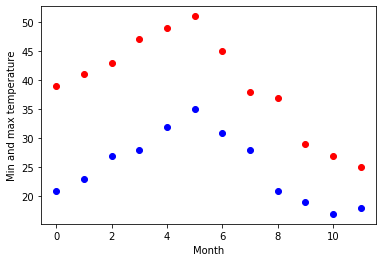

In [10]:
#showing the plot before fitting.
months = np.arange(12)
plt.plot(months, t_max, 'ro')
plt.plot(months, t_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.show()

In [11]:
#fitting it to the periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,t_max, [40,20,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,t_min, [-40,20,0])

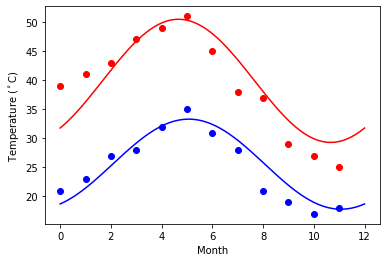

In [12]:
#Plotting the final Graph
days = np.linspace(0, 12, num=365)
plt.plot(months, t_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, t_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

2.Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic=pd.read_csv(url,skip_blank_lines=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


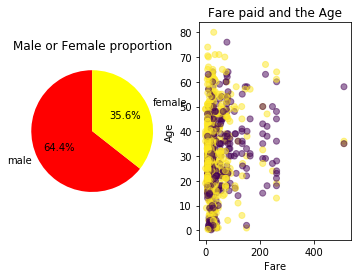

In [7]:
#Create a pie chart presenting the male/female proportion
count=titanic['sex'].value_counts()
colors = ['red', 'yellow']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
ax1.set_title('Male or Female proportion')

#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')
ax2.scatter(titanic['fare'], titanic['age'], c= pd.factorize(titanic['sex'])[0], alpha=0.5)